<a href="https://colab.research.google.com/github/archisha13/Archisha-Srivastava/blob/main/Titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----------------------------------------

* B072  ARCHISHA SRIVASTAVA
* ML_LAB-9  
* BATCH 3 
----------------------------------------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve,roc_auc_score
%matplotlib inline

import warnings #to remove the warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df=df.drop(['Name','Ticket','Cabin','PassengerId','Parch','SibSp'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [ ]:
df.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [ ]:
df.axes

[RangeIndex(start=0, stop=891, step=1),
 Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [ ]:
df['Age'].isnull().sum()

177

In [ ]:
#creating a function to replace null values of age by avg value of age of that corresponding class
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age
#Calling the function using  --- .apply---
df['Age']=df[["Age","Pclass"]].apply(impute_age,axis=1)

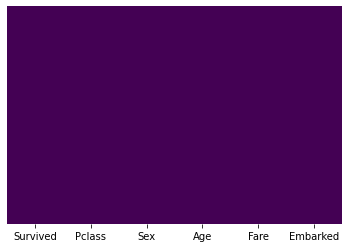

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoding=LabelEncoder()

In [ ]:
df["Embarked"]=label_encoding.fit_transform(df["Embarked"])

In [ ]:
df["Sex"]=label_encoding.fit_transform(df["Sex"])

In [ ]:
y=df['Survived']
x=df.drop(['Survived'],axis=1)

In [ ]:
x

,Pclass,Sex,Age,Fare,Embarked
0,3,1,22.0,7.2500,2
1,1,0,38.0,71.2833,0
2,3,0,26.0,7.9250,2
3,1,0,35.0,53.1000,2
4,3,1,35.0,8.0500,2
...,...,...,...,...,...
886,2,1,27.0,13.0000,2
887,1,0,19.0,30.0000,2
888,3,0,24.0,23.4500,2
889,1,1,26.0,30.0000,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
dec_tree=DecisionTreeClassifier()

In [ ]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2=dec_tree.predict(x_test)
df_pred=pd.DataFrame()


In [ ]:
df_pred['y_test']=y_test
df_pred['y_pred']=y_pred2

In [ ]:
#Accuracy Score
Accuracy=accuracy_score(y_test,y_pred2)
print("Accuracy of the model  for DECISION TREE is: ",Accuracy)

Accuracy of the model  for DECISION TREE is:  0.7988826815642458


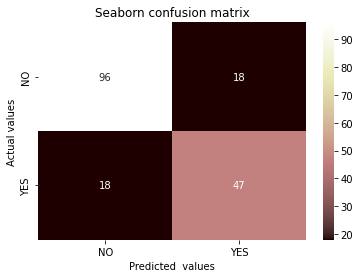

In [ ]:
ConfusionMatrix=confusion_matrix(y_test,y_pred2)
cm=sns.heatmap(ConfusionMatrix,annot=True,cmap='pink')
#adding labels
cm.set_title('Seaborn confusion matrix')
cm.set_xlabel('Predicted  values')
cm.set_ylabel('Actual values')

cm.xaxis.set_ticklabels(['NO','YES'])
cm.yaxis.set_ticklabels(['NO','YES'])
plt.show()

Logistic Regression

In [ ]:
model=LogisticRegression()#using builtin Logistic regression in sklearn
model.fit(x_train,y_train)#training the data

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)#predicting on testing set
print("The predicted value is",y_pred)


The predicted value is [0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1
 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1]


In [ ]:
ConfusionMatrix=confusion_matrix(y_test,y_pred)
print(ConfusionMatrix)

[[104  10]
 [ 18  47]]


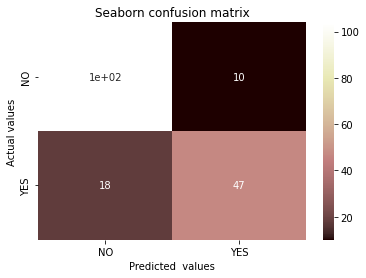

In [ ]:
cm=sns.heatmap(ConfusionMatrix,annot=True,cmap='pink')
#adding labels
cm.set_title('Seaborn confusion matrix')
cm.set_xlabel('Predicted  values')
cm.set_ylabel('Actual values')

cm.xaxis.set_ticklabels(['NO','YES'])
cm.yaxis.set_ticklabels(['NO','YES'])
plt.show()

In [ ]:
Accuracy=accuracy_score(y_test,y_pred)
print("Model Accuracy for LOGISTIC REGRESSION is ",Accuracy)

Model Accuracy for LOGISTIC REGRESSION is  0.8435754189944135


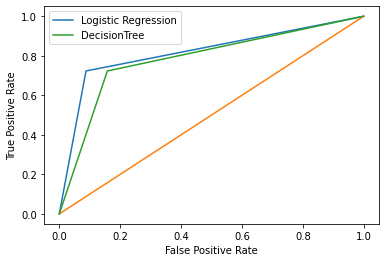

In [ ]:
#Roc curve for logistic model
fpr, tpr, _ = roc_curve(y_test,  y_pred)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

#ROC curve for Decision Tree
n_fpr, n_tpr, _ = roc_curve(y_test,  y_pred2)

#AUC score
aucLogistic = roc_auc_score(y_test, y_pred)
aucNoModel= roc_auc_score(y_test, random_probs)

#create ROC curve
plt.plot(fpr,tpr,label= "Logistic Regression")
plt.plot(p_fpr,p_tpr)
plt.plot(n_fpr,n_tpr,label= "DecisionTree")
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print("AUC score with Logistic is {} and without Logistic is {}".format(aucLogistic,aucNoModel))

AUC score with Logistic is 0.8176788124156545 and without Logistic is 0.5


In [ ]:
#F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_x = scaler.fit_transform(x_train)
scaled_test_x = scaler.fit_transform(x_test)

class Model:
      def __init__(self, model, model_name):
        self.model = model
        self.model_name = model_name
      def predict(self):
        self.model.fit(scaled_train_x,y_train)
        pred = self.model.predict(scaled_test_x)
        cv_score = np.mean(cross_val_score(self.model, scaled_test_x, y_test, cv=5))
        
        self.performance(pred, cv_score)
    
      def performance(self, pred, cv_score):
              print(f'Classification Report\n{classification_report(pred,y_test)}')
model = Model(DecisionTreeClassifier(), 'Decision Tree')
model.predict()

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       107
           1       0.74      0.67      0.70        72

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.76       179
weighted avg       0.77      0.77      0.77       179



In [ ]:
model = Model(LogisticRegression(), 'Logistic Regression')
model.predict()

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       117
           1       0.72      0.76      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



Hence,accuracy and precision are greater when we use Logistic regression as compared to taking Decision Tree as a classifier
